In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data = pd.read_csv(r"C:\FILES\Blearn\dataanalytics\project\Smartphones_cleaned_dataset.csv")

In [27]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    int64  

In [28]:
data = data.drop_duplicates()

In [29]:
data.shape

(980, 26)

In [30]:
data.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
resolution_width               0
resolution_height              0
dtype: int64

In [31]:
print(data[['model', 'rating']].to_string())

                                                  model  rating
0                                         OnePlus 11 5G    89.0
1                             OnePlus Nord CE 2 Lite 5G    81.0
2                                 Samsung Galaxy A14 5G    75.0
3                                  Motorola Moto G62 5G    81.0
4                                    Realme 10 Pro Plus    82.0
5               Samsung Galaxy F23 5G (6GB RAM + 128GB)    80.0
6                                       Apple iPhone 14    81.0
7                         Xiaomi Redmi Note 12 Pro Plus    86.0
8                                       Nothing Phone 1    85.0
9                                    OnePlus Nord 2T 5G    84.0
10                                        Realme 10 Pro    82.0
11                                             Oppo A78    79.0
12                          Xiaomi Redmi Note 12 Pro 5G    79.0
13                         Vivo T1 5G (6GB RAM + 128GB)    80.0
14                          Samsung Gala

In [32]:
# for column in data.columns:
#     if data[column].dtype == 'float' or data[column].dtype == 'int':
#         data[column] = data[column].fillna(data[column].median()) 
#     else:
#         data[column] = data[column].fillna(data[column].mode())

In [33]:
data.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
resolution_width               0
resolution_height              0
dtype: int64

In [34]:
data['price_category'] = pd.cut(
    data["price"],
    bins=[0, 15000, 30000, 50000, 75000, np.inf],
    labels=['budget', 'mid', 'upper_mid', 'premium', 'ultra_premium']
)

In [35]:
print(data[["model","rating","price",'price_category']].to_string())

                                                  model  rating   price price_category
0                                         OnePlus 11 5G    89.0   54999        premium
1                             OnePlus Nord CE 2 Lite 5G    81.0   19989            mid
2                                 Samsung Galaxy A14 5G    75.0   16499            mid
3                                  Motorola Moto G62 5G    81.0   14999         budget
4                                    Realme 10 Pro Plus    82.0   24999            mid
5               Samsung Galaxy F23 5G (6GB RAM + 128GB)    80.0   16999            mid
6                                       Apple iPhone 14    81.0   65999        premium
7                         Xiaomi Redmi Note 12 Pro Plus    86.0   29999            mid
8                                       Nothing Phone 1    85.0   26749            mid
9                                    OnePlus Nord 2T 5G    84.0   28999            mid
10                                        R

In [36]:
print(data.describe())

               price      rating   num_cores  processor_speed  \
count     980.000000  879.000000  974.000000       938.000000   
mean    32520.504082   78.258248    7.772074         2.427217   
std     39531.812669    7.402854    0.836845         0.464090   
min      3499.000000   60.000000    4.000000         1.200000   
25%     12999.000000   74.000000    8.000000         2.050000   
50%     19994.500000   80.000000    8.000000         2.300000   
75%     35491.500000   84.000000    8.000000         2.840000   
max    650000.000000   89.000000    8.000000         3.220000   

       battery_capacity  fast_charging_available  fast_charging  ram_capacity  \
count        969.000000               980.000000     769.000000    980.000000   
mean        4817.748194                 0.854082      46.126138      6.560204   
std         1009.540054                 0.353205      34.277870      2.744378   
min         1821.000000                 0.000000      10.000000      1.000000   
25%      

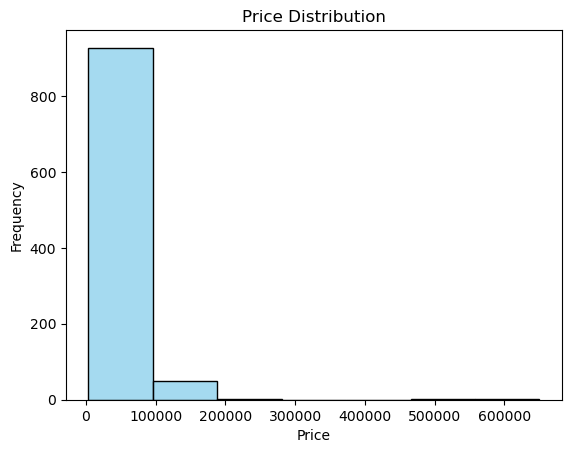

In [44]:

# Price distribution
sns.histplot(data=data['price'], bins=7, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()

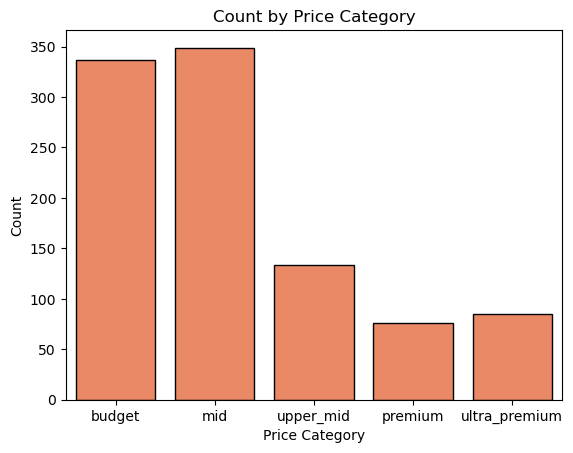

In [39]:

# Price category count
price_cat_counts = data['price_category'].value_counts()

sns.barplot(
    x=price_cat_counts.index,
    y=price_cat_counts.values,
    color='coral',
    edgecolor='black'
)

plt.title('Count by Price Category', fontsize=12)
plt.xlabel('Price Category')
plt.ylabel('Count')
plt.show()
